C:\Users\Asus\AppData\Local\Temp\ipykernel_8780\3680562904.py:4: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread("messi.jpg")


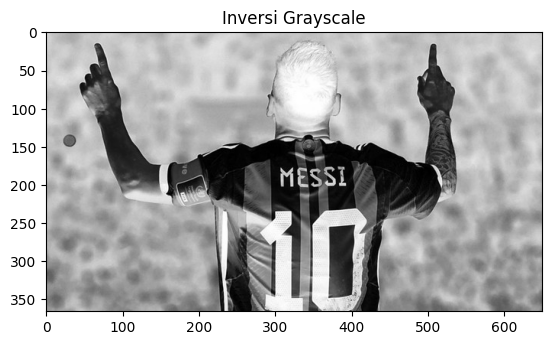

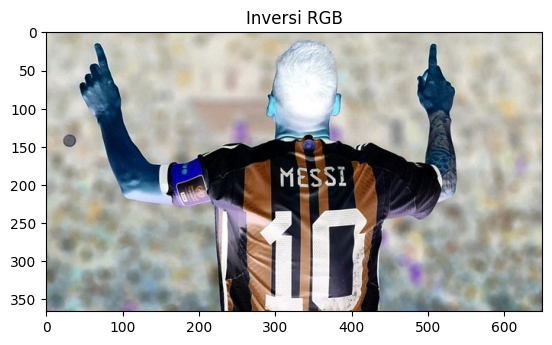

In [1]:
#memuat gambar "messi.jpg" menggunakan modul imageio
import numpy as np
import imageio

#untuk mendapatkan dimensi gambar (tinggi, lebar, dan jumlah channel warna)
import matplotlib.pyplot as plt
img = imageio.imread("messi.jpg")
img_height = img.shape[0]
img_width = img.shape[1]
img_channel = img.shape[2]
img_inversi = np.zeros(img.shape, dtype=np.uint8) #membuat numpy array dengan tipe data uint8 berdimensi sama dengan gambar awal sebagai tempat penyimpanan hasil inversi

#melakukan inversi warna pada gambar grayscale dengan cara menghitung nilai rata-rata dari nilai channel merah, hijau, dan biru di setiap piksel, lalu dikurangi dengan nilai maksimum dan hasilnya disimpan ke array img_inversi
def inversi_grayscale(nilai):
    for y in range(0, img_height):
        for x in range(0, img_width):
            red = img[y][x][0]
            green = img[y][x][1]
            blue = img[y][x][2]
            gray = (int(red) + int(green) + int(blue)) / 3
            gray = nilai - gray
            img_inversi[y][x] = (gray, gray, gray)

# melakukan inversi warna pada gambar RGB dengan cara mengurangi nilai maksimum dengan nilai channel merah, hijau, dan biru di setiap piksel, lalu menyimpan hasilnya ke array img_inversi
def inversi_rgb(nilai):
    for y in range(0, img_height):
        for x in range(0, img_width):
            red = img[y][x][0]
            red = nilai - red
            green = img[y][x][1]
            green = nilai - green
            blue = img[y][x][2]
            blue = nilai - blue
            img_inversi[y][x] = (red, green, blue)

#menampilkan hasil inversi pada gambar grayscale dengan memanggil fungsi inversi_grayscale dengan parameter nilai 255 (nilai maksimum)
inversi_grayscale(255)
plt.imshow(img_inversi)
plt.title("Inversi Grayscale")
plt.show()

#menampilkan hasil inversi pada gambar RGB dengan memanggil fungsi inversi_rgb dengan parameter nilai 255 (nilai maksimum)
inversi_rgb(255)
plt.imshow(img_inversi)
plt.title("Inversi RGB")
plt.show()

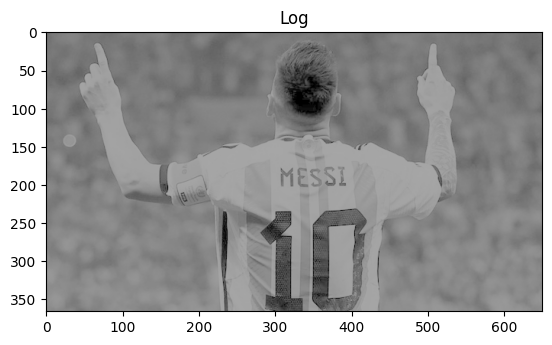

In [3]:
img_log = np.zeros(img.shape, dtype=np.uint8) #dideklarasikan sebagai array numpy dengan ukuran yang sama dengan citra img, dan dengan tipe data uint8

# fungsi log yang menerima parameter c, yang digunakan untuk melakukan operasi transformasi logaritmik pada citra grayscale
def log(c):
    #dilakukan perulangan untuk setiap piksel pada citra grayscale
    for y in range(0, img_height):
        #nilai intensitas RGB dari piksel saat ini diambil
        for x in range(0, img_width):
            red = img[y][x][0]
            green = img[y][x][1]
            blue = img[y][x][2]
            gray = (int(red) + int(green) + int(blue)) / 3 #nilai intensitas grayscale dihitung dengan cara menjumlahkan nilai intensitas RGB dan membaginya dengan 3.
            gray = int(c * np.log(gray + 1)) #nilai intensitas grayscale diubah dengan menggunakan rumus transformasi logaritmik, yaitu int(c * np.log(gray + 1))
            #dilakukan pengecekan apabila nilai intensitas grayscale setelah dilakukan transformasi logaritmik lebih besar dari 255 atau lebih kecil dari 0, maka nilai tersebut akan diset ke 255 atau 0
            if gray > 255:
                gray = 255
            if gray < 0:
                gray = 0
            img_log[y][x] = (gray, gray, gray) #nilai intensitas piksel baru disimpan ke dalam img_log
log(30) #fungsi log dipanggil dengan nilai parameter c=30

#citra hasil transformasi logaritmik ditampilkan dengan menggunakan plt.imshow dan diberi judul "Log"
plt.imshow(img_log) 
plt.title("Log")
plt.show()

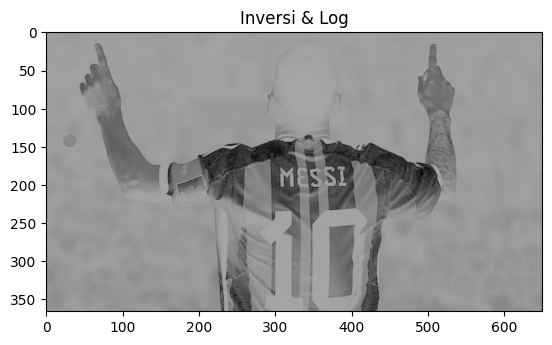

In [4]:
img_inlog = np.zeros(img.shape, dtype=np.uint8) #Membuat array numpy kosong dengan ukuran dan tipe data yang sama dengan citra img dan menyimpannya ke dalam variabel img_inlog
def inlog(c): #Membuat fungsi inlog yang memiliki satu parameter c
    for y in range(0, img_height): #Melakukan perulangan untuk setiap baris citra
        for x in range(0, img_width): #Melakukan perulangan untuk setiap piksel dalam satu baris citra
            red = img[y][x][0] #Mengambil nilai intensitas warna merah dari piksel yang ditunjuk oleh koordinat (x, y) dalam citra img dan menyimpannya ke dalam variabel red
            green = img[y][x][1] #Mengambil nilai intensitas warna hijau dari piksel yang ditunjuk oleh koordinat (x, y) dalam citra img dan menyimpannya ke dalam variabel green
            blue = img[y][x][2] # Mengambil nilai intensitas warna biru dari piksel yang ditunjuk oleh koordinat (x, y) dalam citra img dan menyimpannya ke dalam variabel blue
            gray = (int(red) + int(green) + int(blue)) / 3 #Menghitung nilai rata-rata intensitas warna dari ketiga komponen warna (merah, hijau, dan biru) pada piksel yang ditunjuk oleh koordinat (x, y) dalam citra img dan menyimpannya ke dalam variabel gray
            gray = int(c * np.log(255 - gray + 1)) #Menghitung nilai intensitas warna baru setelah diberi efek inversi dan logaritma pada piksel yang ditunjuk oleh koordinat (x, y) dalam citra img, kemudian menyimpannya ke dalam variabel gray
            if gray > 255: #Memeriksa apakah nilai intensitas warna pada variabel gray lebih besar dari 255
                gray = 255 #jika ya, maka nilai intensitas warna pada variabel gray diatur menjadi 255
            if gray < 0: #Memeriksa apakah nilai intensitas warna pada variabel gray lebih kecil dari 0
                gray = 0 #Jika ya, maka nilai intensitas warna pada variabel gray diatur menjadi 0
            img_inlog[y][x] = (gray, gray, gray) #Menyimpan nilai intensitas warna baru pada piksel yang ditunjuk oleh koordinat (x, y) dalam citra img_inlog
inlog(30) #Memanggil fungsi inlog dengan parameter c=30
plt.imshow(img_inlog) #Menampilkan citra img_inlog
plt.title("Inversi & Log") #Memberikan judul pada citra yang ditampilkan
plt.show() #Menampilkan citra

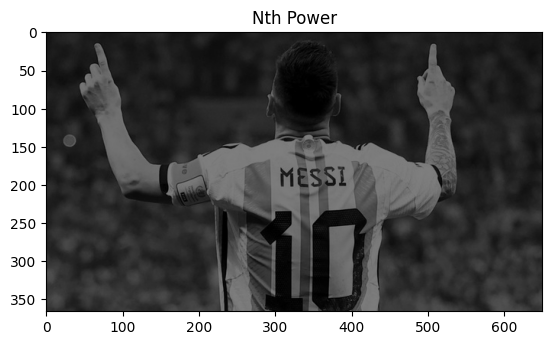

In [5]:
img_nthpower = np.zeros(img.shape, dtype=np.uint8) #membuat array numpy berukuran sama dengan citra asli dengan tipe data unsigned integer 8-bit yang diinisialisasi dengan nilai 0. Citra akan disimpan dalam array ini setelah mengalami transformasi
def nthpower(c, y): #mendefinisikan sebuah fungsi bernama nthpower dengan dua parameter masukan yaitu c dan y. Fungsi ini akan melakukan transformasi Nth Power pada citra
    thc = c / 100 #menghitung nilai threshold thc sebagai hasil pembagian nilai c dengan 100
    thy = y / 100 #menghitung nilai threshold thy sebagai hasil pembagian nilai y dengan 100
    for y in range(0, img_height): #loop untuk setiap baris citra
        for x in range(0, img_width): #loop untuk setiap kolom citra
            red = img[y][x][0] #mengambil nilai komponen merah (red) dari citra pada posisi (x, y)
            green = img[y][x][1] #mengambil nilai komponen hijau (green) dari citra pada posisi (x, y)
            blue = img[y][x][2] #mengambil nilai komponen biru (blue) dari citra pada posisi (x, y)
            gray = (int(red) + int(green) + int(blue)) / 3 #menghitung nilai keabuan (grayscale) dengan mengambil nilai rata-rata dari tiga komponen warna
            gray = int(thc * pow(gray, thy)) #menghitung nilai pixel setelah transformasi Nth Power. Nilai gray dipangkatkan dengan nilai thy dan kemudian dikalikan dengan nilai thc
            #jika nilai pixel melebihi nilai maksimum yang dapat direpresentasikan oleh 8-bit unsigned integer (yaitu 255), maka nilai pixel diatur menjadi 255
            if gray > 255: 
                gray = 255
            #jika nilai pixel negatif, maka nilai pixel diatur menjadi 0
            if gray < 0:
                gray = 0
            img_nthpower[y][x] = (gray, gray, gray) #menempatkan nilai pixel yang sudah ditransformasi ke array citra img_nthpower
nthpower(50, 100) #menjalankan fungsi nthpower dengan konstanta c bernilai 50 dan eksponen y bernilai 100
plt.imshow(img_nthpower) #menampilkan citra yang sudah ditransformasi dengan fungsi nthpower menggunakan pyplot dari Matplotlib
plt.title("Nth Power") #memberikan judul untuk citra yang ditampilkan
plt.show() #menampilkan citra yang sudah ditransformasi

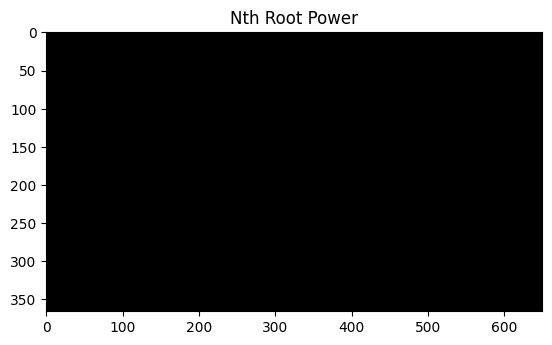

In [6]:
img_nthrootpower = np.zeros(img.shape, dtype=np.uint8) #Membuat array numpy kosong dengan tipe data uint8 dengan ukuran yang sama seperti gambar asli, yang akan digunakan untuk menyimpan hasil transformasi
def nthrootpower(c, y): #Membuat fungsi nthrootpower dengan parameter c dan y yang akan digunakan untuk mengubah intensitas piksel
    #Mengkonversi nilai c dan y ke dalam rentang 0 hingga 1. Kedua nilai ini akan digunakan untuk mengontrol kekuatan transformasi
    thc = c / 100
    thy = y / 100
    #melakukan iterasi pada setiap piksel gambar
    for y in range(0, img_height):
        for x in range(0, img_width):
            #Mengambil nilai intensitas warna merah, hijau, dan biru pada piksel saat ini
            red = img[y][x][0]
            green = img[y][x][1]
            blue = img[y][x][2]
            gray = (int(red) + int(green) + int(blue)) / 3 #menghitung nilai rata-rata intensitas warna pada piksel saat ini
            gray = int(thc * pow(gray, 1./thy)) #Mengubah intensitas piksel dengan memperkuat (mengangkat ke pangkat) nilai rata-rata intensitas warna pada piksel dengan kekuatan thy, lalu mengkalikan dengan thc
            #Membatasi nilai intensitas piksel agar tidak melebihi batas 255 dan tidak kurang dari 0
            if gray > 255:
                gray = 255
            if gray < 0:
                gray = 0
            img_nthpower[y][x] = (gray, gray, gray) #Menyimpan nilai intensitas piksel yang sudah diubah pada array numpy img_nthrootpower
nthrootpower(50, 100) #Memanggil fungsi nthrootpower dengan c=50 dan y=100
#Menampilkan gambar hasil transformasi pada jendela plot
plt.imshow(img_nthrootpower) 
plt.title("Nth Root Power")
plt.show()